In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean

In [2]:
df6 = pd.read_csv('df6.csv', 
                    parse_dates=['date_onset_symptoms', 'date_admission_hospital', 'date_confirmation'],
                    dtype={
                        'city': 'string',
                        'province': 'string',
                        'country': 'string',
                    })

df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235496 entries, 0 to 235495
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   city                     235423 non-null  string        
 1   province                 235238 non-null  string        
 2   country                  235496 non-null  string        
 3   latitude                 235496 non-null  float64       
 4   longitude                235496 non-null  float64       
 5   date_onset_symptoms      235496 non-null  datetime64[ns]
 6   date_admission_hospital  235496 non-null  datetime64[ns]
 7   date_confirmation        235496 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(2), string(3)
memory usage: 14.4 MB


In [3]:
data_from_Colombia = df6[df6.country.isin(['Colombia'])]

data_from_Colombia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33565 entries, 186833 to 235495
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   city                     33565 non-null  string        
 1   province                 33565 non-null  string        
 2   country                  33565 non-null  string        
 3   latitude                 33565 non-null  float64       
 4   longitude                33565 non-null  float64       
 5   date_onset_symptoms      33565 non-null  datetime64[ns]
 6   date_admission_hospital  33565 non-null  datetime64[ns]
 7   date_confirmation        33565 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(2), string(3)
memory usage: 2.3 MB


In [4]:
min(data_from_Colombia.date_admission_hospital), max(data_from_Colombia.date_admission_hospital)

(Timestamp('2020-01-23 00:00:00'), Timestamp('2020-12-25 00:00:00'))

In [5]:
len(np.unique(data_from_Colombia.date_admission_hospital.values))

100

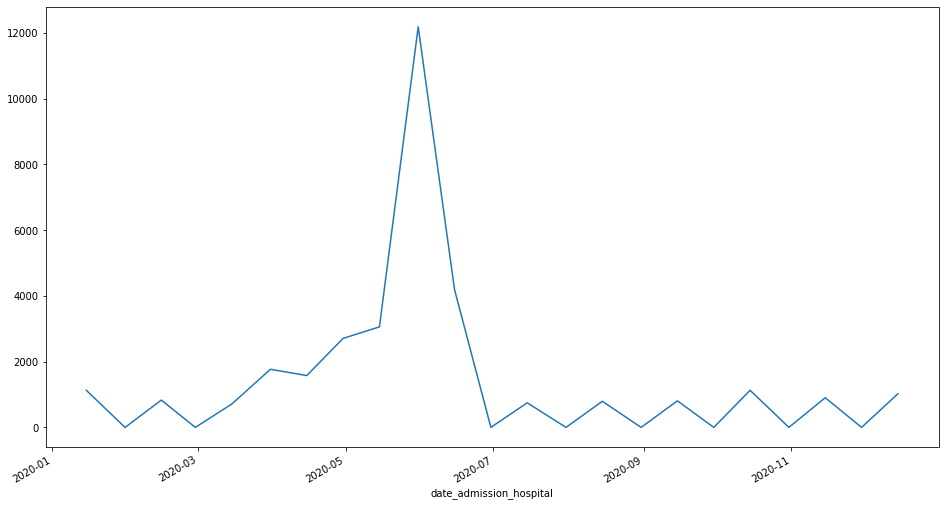

In [6]:
df6[df6.country.isin(['Colombia'])].groupby(pd.Grouper(key='date_admission_hospital', freq='SM')).size().plot(figsize=(16, 9))

plt.show()

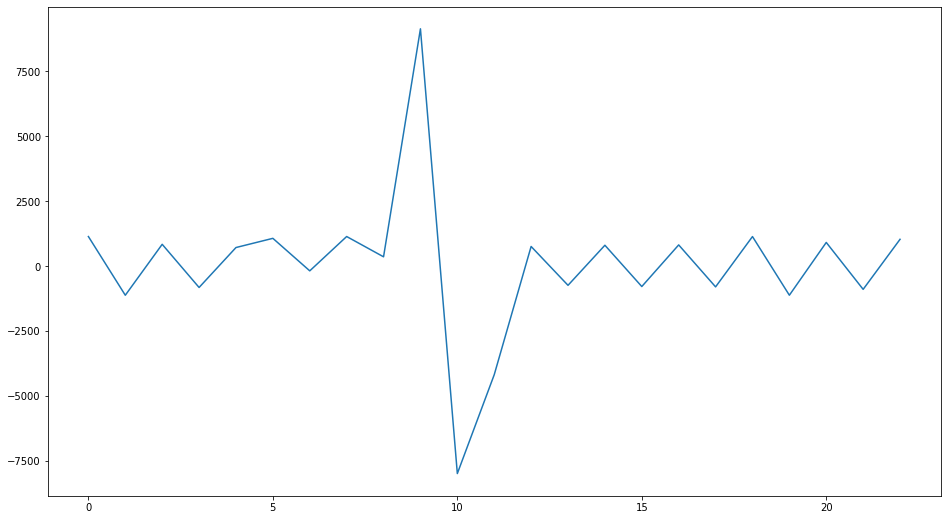

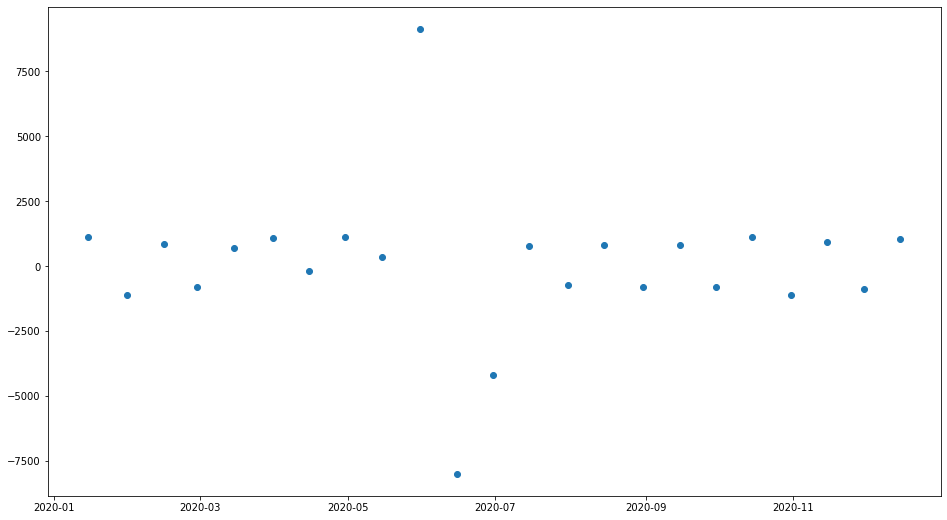

In [7]:
def calculate_rate(country: str) -> pd.DataFrame:
    cnt = df6[df6.country.isin([country])].groupby(pd.Grouper(key='date_admission_hospital', freq='SM')).size()
    rate_arr = [(cnt.iloc[i] - (cnt.iloc[i-1] if i != 0 else 0)) for i in range(len(cnt))]
    return pd.DataFrame({'date': cnt.index, 'total_count': cnt.values, 'rate': rate_arr})

rate = calculate_rate('Colombia')

rate.rate.plot(figsize=(16,9))

import matplotlib.pyplot as plt

plt.figure(figsize=(16,9))

plt.scatter(rate.date, rate.rate)

plt.show()

<AxesSubplot:xlabel='date_admission_hospital'>

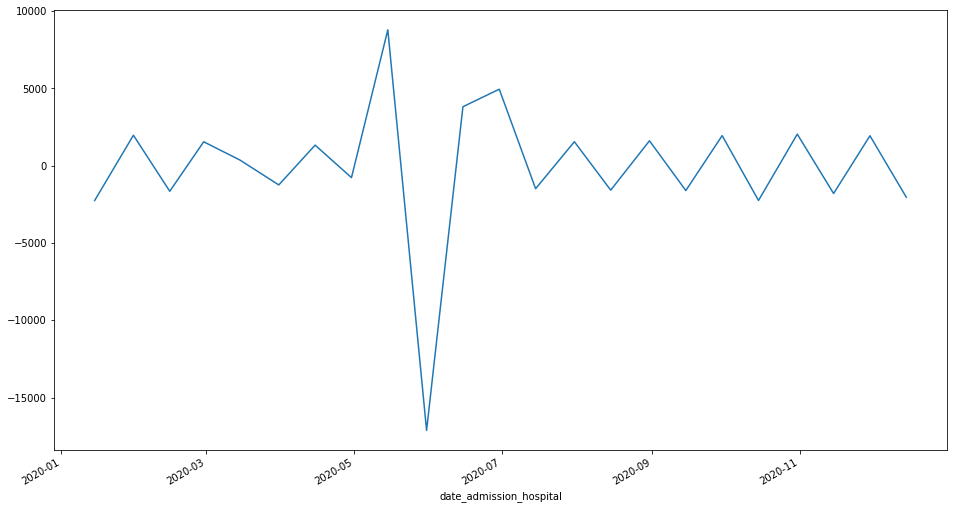

In [8]:
def calculate_rate_of_rate(country: str) -> pd.DataFrame:
    cnt = df6[df6.country.isin([country])].groupby(pd.Grouper(key='date_admission_hospital', freq='SM')).size()
    rate_arr = [((cnt.iloc[i+1] if i != len(cnt)-1 else 0) + (cnt.iloc[i-1] if i != 0 else 0) - 2*cnt.iloc[i]) for i in range(len(cnt))]
    return pd.DataFrame({'date': cnt.index, 'total_count': cnt, 'rate': rate_arr})

calculate_rate_of_rate('Colombia').rate.plot(figsize=(16, 9))

y = -20.89426877470356x + 273.8369565217391


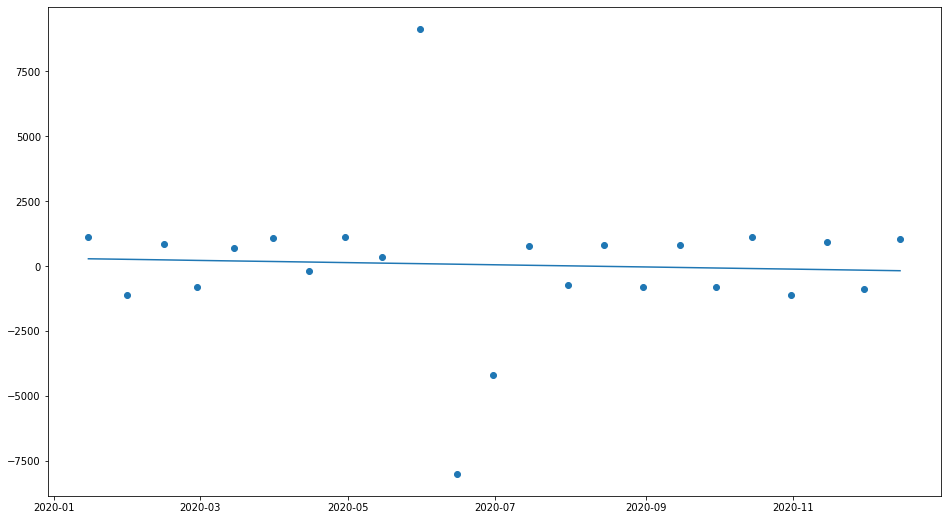

In [9]:
rate = calculate_rate('Colombia')

X, y = rate.index, rate.rate.values

def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)
    
    return m, b

m, b = best_fit_slope_and_intercept(X, y)

print('y = {}x + {}'.format(m, b))

regression_line = [(m*x)+b for x in X]

plt.figure(figsize=(16,9))

plt.scatter(rate.date, rate.rate)
plt.plot(rate.date, regression_line)

plt.show()